## **Importación de las librerías necesarias**

In [190]:
import numpy as np
import pandas as pd
import re
from stop_words import get_stop_words
import matplotlib.pyplot as plt
import seaborn as sns
import stylecloud
from googletrans import Translator

OBSERVACIÓN: 
* Antes de realizar el ``EDA`` detallado de los campos más relevantes de cada plataforma de cursos en línea, se llevará a cabo un ``ETL`` de los datasets correspondientes que se utilizarán en el proyecto de Data Analytics. Esto se realizará con el fin de garantizar la calidad, consistencia y estructura adecuada de los datos, permitiendo realizar un análisis más preciso y confiable.

## **Datasets: ``Plataforma Coursera``**

### **ETL**

* #### **Carga de Datos**

In [257]:
# Primer dataset
df_cour1=pd.read_csv("Datasets/Coursera_courses.csv")
df_cour1

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training
...,...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution


In [258]:
# Información del dataset 1
df_cour1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [259]:
# Segundo dataset
df_cour2=pd.read_csv("Datasets/Coursera_reviews.csv")
df_cour2

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


In [260]:
# Información del dataset 2
df_cour2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


* #### **Eliminación de columnas innecesarias**
* ``course_url``: se elimina debido a la imposibilidad de obtener información adicional a través del web scraping y a la falta de relevancia directa en el análisis y el desarrollo del dashboard.
* ``reviews``: para simplificar el análisis y la visualización, no se toma en cuwenta esta variable, ya que los comentarios de los estudiantes pueden ser subjetivos y difíciles de resumir adecuadamente en un enfoque cuantitativo. En lugar de analizar los comentarios individualmente, se enfocará en las calificaciones promedio y la cantidad de reseñas.
* ``reviewers``: esta columna no se considera debido a la confidencialidad y privacidad de los revisores, protegiendo así la identidad y datos personales de los usuarios involucrados.
* ``date_reviews``: Se ha decidido eliminar debido a que, para el análisis y la creación del dashboard, el enfoque se centra en las características inherentes de los cursos y las calificaciones, sin considerar la temporalidad de las reseñas.

In [261]:
df_cour1.drop(columns="course_url",inplace=True)
df_cour2.drop(columns=["reviews","reviewers","date_reviews"],inplace=True)

* #### **Creación de las variables `rating_mean` y `count_reviews`**

Utilizando el dataframe ``df_cour2``, se generarán las columnas correspondientes para obtener el puntaje promedio y el recuento de reseñas por ``course_id``.

In [262]:
# Dataframe con la columna 'count_reviews'
df1=df_cour2.groupby("course_id").count().reset_index().rename(columns={"rating":"count_reviews"})
df1

,course_id,count_reviews
0,aboriginal-education,197
1,access-control-sscp,131
2,accounting-analytics,1356
3,accounting-data-analytics-python,24
4,actualizacion-manejo-diabetes-tipo-2,519
...,...,...
599,womens-health-human-rights,624
600,write-a-feature-length-screenplay-for-film-or-...,90
601,write-your-first-novel,52
602,writing-editing-words,309


In [263]:
# Dataframe con la columna 'rating_mean'
df2=df_cour2.groupby("course_id")["rating"].mean().round(2).reset_index().rename(columns={"rating":"rating_mean"})
df2

,course_id,rating_mean
0,aboriginal-education,4.60
1,access-control-sscp,4.57
2,accounting-analytics,4.43
3,accounting-data-analytics-python,3.50
4,actualizacion-manejo-diabetes-tipo-2,4.87
...,...,...
599,womens-health-human-rights,4.89
600,write-a-feature-length-screenplay-for-film-or-...,4.67
601,write-your-first-novel,3.94
602,writing-editing-words,4.78


In [264]:
# Creando un solo dataframe que contenga todas las variables
df_coursera=pd.merge(df_cour1,df1,on="course_id",how="inner")
df_coursera=pd.merge(df_coursera,df2,on="course_id",how="inner")
# Visualizando el resultado
df_coursera

,name,institution,course_id,count_reviews,rating_mean
0,Machine Learning,Stanford University,machine-learning,35895,4.75
1,Indigenous Canada,University of Alberta,indigenous-canada,3702,4.81
2,The Science of Well-Being,Yale University,the-science-of-well-being,20085,4.93
3,Technical Support Fundamentals,Google,technical-support-fundamentals,35319,4.78
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,google-cbrs-cpi-training,87,4.93
...,...,...,...,...,...
599,Hacia una práctica constructivista en el aula,Pontificia Universidad Católica de Chile,aulaconstructivista,1497,4.91
600,Hypothesis-Driven Development,University of Virginia,uva-darden-agile-testing,302,4.58
601,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,accounting-data-analytics-python,24,3.50
602,Introduction to Molecular Spectroscopy,University of Manchester,spectroscopy,1076,4.65


In [265]:
# Eliminado la columna 'course_id', puesto que ya no será necesaria
df_coursera.drop(columns=["course_id"],inplace=True)

* #### **Preprocesamiento de texto de la variable `name` (solo para el EDA)**

In [266]:
# Implementando una función que realize el preprocesamiento de texto para la realización de los Word clouds
def preprocess_text(text):
    # Conversión a minúsculas
    text=text.lower()
    #Eliminación de los signos de puntuación utilizando con la librería regex
    text=re.sub(r"[^\w\s]","",text)
    #Eliminación de las palabras irrelevantes utilizando la librería stop_words
    stop_word=get_stop_words("english")+get_stop_words("spanish")
    text=text.split()
    text=[word for word in text if word not in stop_word]
    return text

In [267]:
df_coursera["title"]=df_coursera.name.apply(preprocess_text)

* #### **Visualización del resultado del ETL**

In [268]:
df_coursera.head(3)

,name,institution,count_reviews,rating_mean,title
0,Machine Learning,Stanford University,35895,4.75,"[machine, learning]"
1,Indigenous Canada,University of Alberta,3702,4.81,"[indigenous, canada]"
2,The Science of Well-Being,Yale University,20085,4.93,"[science, wellbeing]"


In [269]:
df_coursera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 603
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           604 non-null    object 
 1   institution    604 non-null    object 
 2   count_reviews  604 non-null    int64  
 3   rating_mean    604 non-null    float64
 4   title          604 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 28.3+ KB


### **Análisis Exploratorio de Datos (EDA)**

#### **``Análisis Univariado``**

* #### **Estadísticas descriptivas de las variables numéricas**

In [270]:
df_coursera.describe()

,count_reviews,rating_mean
count,604.000000,604.000000
mean,2408.461921,4.630778
std,4599.422887,0.398211
min,3.000000,1.000000
25%,374.250000,4.570000
50%,1071.500000,4.730000
75%,2408.250000,4.820000
max,45218.000000,5.000000


* #### **Diagramas de Cajas de las variables numéricas**

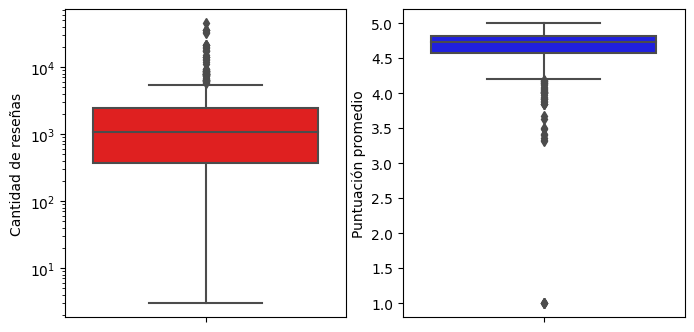

In [271]:
fig,ax=plt.subplots(1,2,figsize=(8,4))

sns.boxplot(y="count_reviews",data=df_coursera,ax=ax[0],color="red")
ax[0].set(yscale="log")
ax[0].set_ylabel("Cantidad de reseñas")

sns.boxplot(y="rating_mean",data=df_coursera,ax=ax[1],color="blue")
ax[1].set_ylabel("Puntuación promedio");

CONCLUSIÓN: Se observa que la variable ``count_reviews`` presenta valores atípicos en el extremo superior, lo que indica que hay pocos cursos que han recibido un gran número de puntuaciones en la plataforma de Coursera. Por otro lado, la variable ``rating_mean`` muestra valores atípicos en el extremo inferior, lo que significa que la mayoría de los cursos tienen puntajes promedio altos, mientras que solo unos pocos tienen un puntaje aproximadamente inferior a 4.2.

* #### **Histogramas de las variables numéricas**

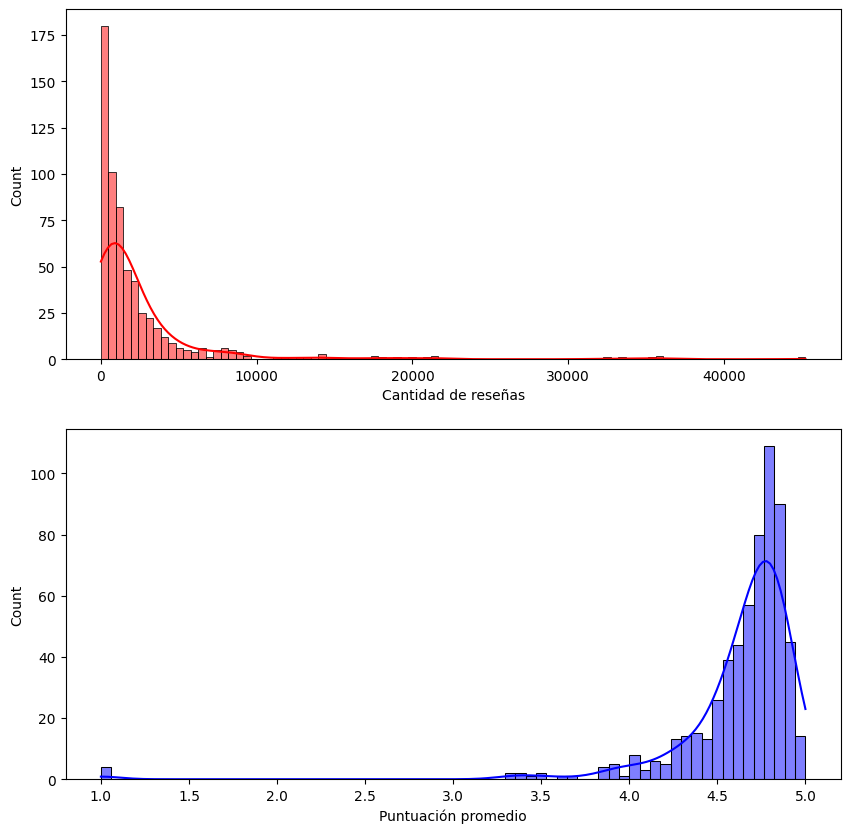

In [272]:
fig,ax=plt.subplots(2,1,figsize=(10,10))

sns.histplot(x="count_reviews",data=df_coursera,ax=ax[0],color="red",kde=True)
ax[0].set_xlabel("Cantidad de reseñas")

sns.histplot(x="rating_mean",data=df_coursera,ax=ax[1],color="blue",kde=True)
ax[1].set_xlabel("Puntuación promedio");

CONCLUSIÓN: La variable ``count_reviews`` muestra una distribución sesgada hacia la derecha, con outliers superiores que generan un pico principal alrededor de 0. Por otro lado, la variable ``rating_mean`` presenta una distribución sesgada hacia la izquierda, debido a los outliers inferiores, y su pico principal se encuentra aproximadamente alrededor de 4.7. Estos hallazgos respaldan y refuerzan las conclusiones obtenidas a través del análisis de los boxplots.

* #### **Barplot (Gráfico de Barras)  de las variable categórica `institution`**

*Los barplots son gráficos visuales que representan datos categóricos en forma de barras rectangulares, donde la longitud de cada barra indica la frecuencia o magnitud de una categoría. Son utilizados para visualizar comparaciones, distribuciones o relaciones entre diferentes categorías o variables en un conjunto de datos de manera clara, sencilla y concisa.*

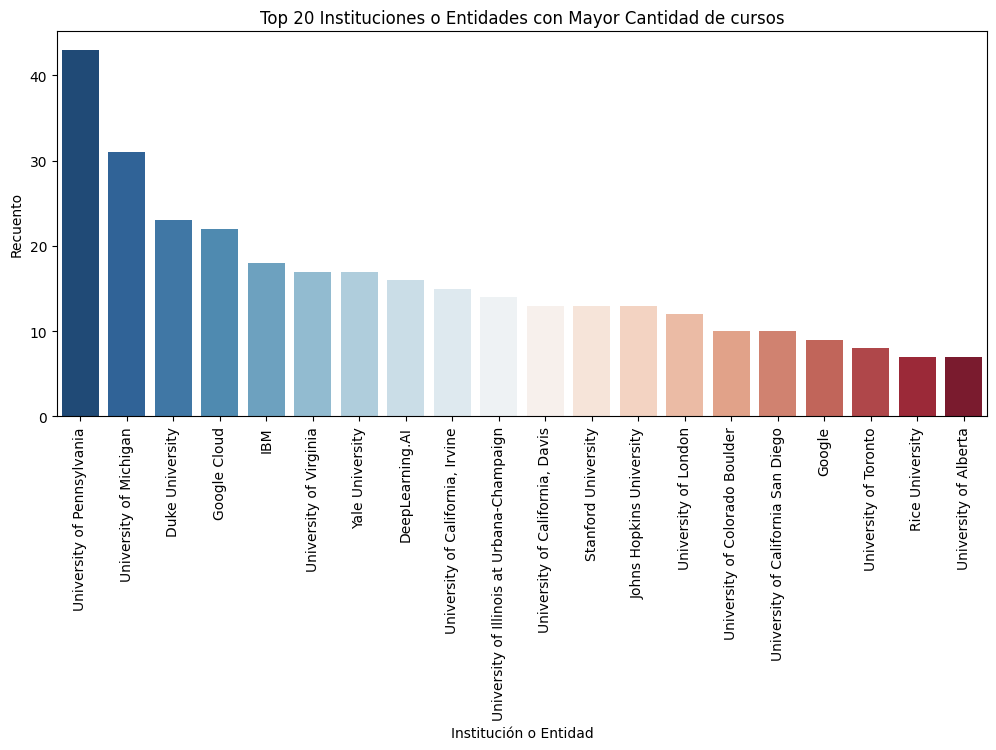

In [273]:
top_institution=df_coursera.institution.value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=top_institution.index,y=top_institution,palette="RdBu_r")
plt.xlabel('Institución o Entidad')
plt.ylabel('Recuento')
plt.title('Top 20 Instituciones o Entidades con Mayor Cantidad de cursos')
plt.xticks(rotation=90);

* #### **Word Cloud: variable `title`**

*Los word clouds, o nubes de palabras, son representaciones visuales que resaltan las palabras más frecuentes en un texto o conjunto de datos, donde el tamaño de cada palabra está relacionado con su frecuencia de aparición. Se utilizan para visualizar patrones, temas o tendencias clave en el contenido de un texto de manera intuitiva y llamativa.*

In [274]:
# Creamos una variable donde estén unidas todas las palabras de todas las filas de la columna 'title'
text=" ".join(df_coursera.title.str.join(" "))
# Generamos una imagen que contenga las palabras que más se repiten en la columna 'title'
stylecloud.gen_stylecloud(text=text,
                          icon_name="fas fa-cloud",
                          background_color="black",
                          output_name="title_coursera_wordcloud.png")

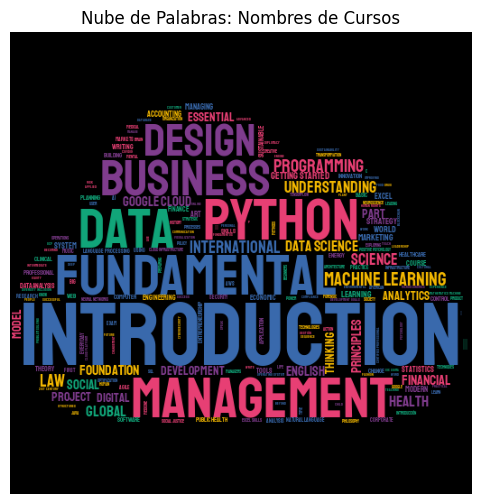

In [275]:
# Visualizamos la imagen del Word Cloud generado
image=plt.imread("Datasets/title_coursera_wordcloud.png")
plt.figure(figsize=(8,6))
plt.title("Nube de Palabras: Nombres de Cursos")
plt.imshow(image)
plt.axis("off");

#### **``Análisis Bivariado``**

* #### **Heatmap de las variables numéricas**

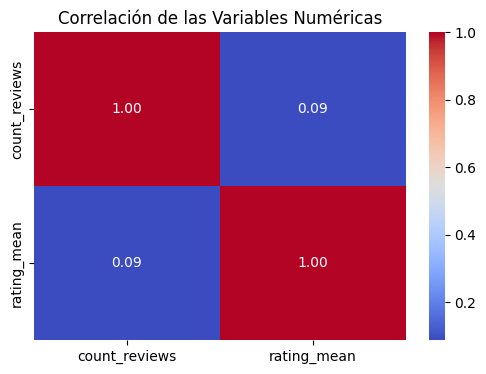

In [276]:
plt.figure(figsize=(6,4))
sns.heatmap(df_coursera.corr(numeric_only=True),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlación de las Variables Numéricas");

CONCLUSIÓN: Se observa una correlación positiva baja (0.09) entre las variables ``count_reviews`` y ``rating_mean``. Esto implica que el número de reseñas de un curso no se correlaciona fuertemente con su puntaje promedio, lo que indica que un curso con muchas reseñas no necesariamente tiene una calificación alta.

* #### **Barplot: Puntaje Promedio por Institución o Entidad**

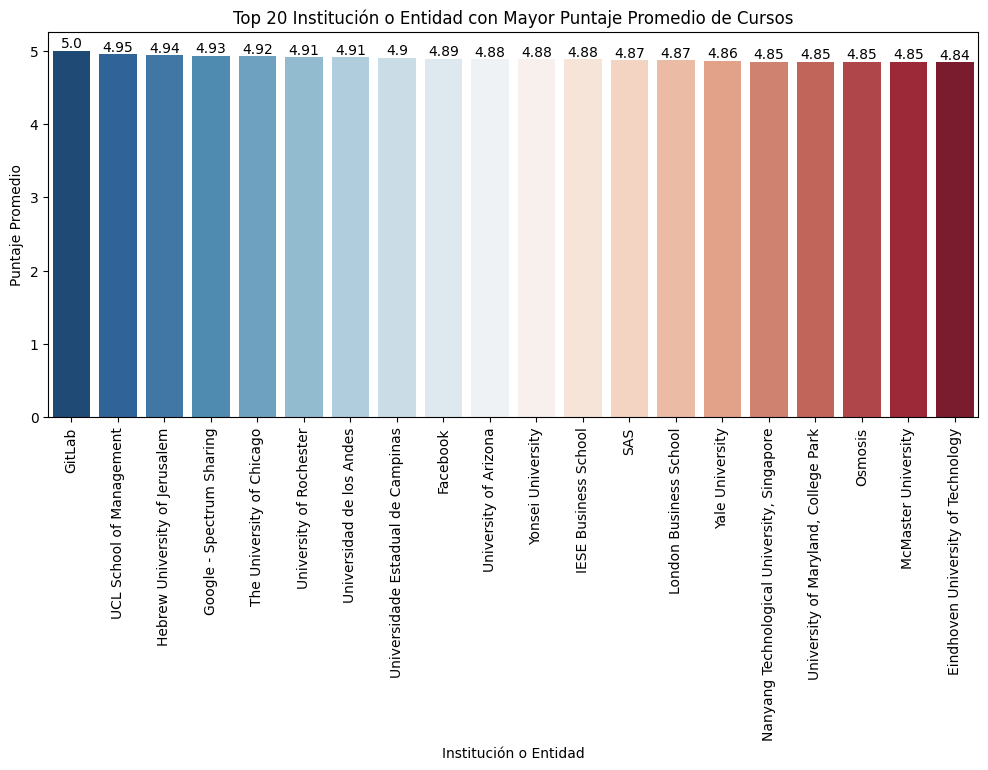

In [277]:
df_b1=df_coursera.groupby("institution")["rating_mean"].mean().round(2).sort_values(ascending=False).head(20)
plt.figure(figsize=(12,5))
ax=sns.barplot(x=df_b1.index, y=df_b1, palette="RdBu_r")
plt.xlabel("Institución o Entidad")
plt.ylabel("Puntaje Promedio")
plt.title("Top 20 Institución o Entidad con Mayor Puntaje Promedio de Cursos")
plt.xticks(rotation=90)

for i, v in enumerate(df_b1):
    ax.text(i,v,str(v),horizontalalignment="center",verticalalignment="bottom",fontweight="normal");

CONCLUSIÓN: A partir del gráfico de barras, se desprende que la mayoría de las instituciones o entidades con los puntajes promedio más altos en todos sus cursos son universidades. Además, se destaca que las entidades o instituciones dentro de este top 20 tienen puntajes promedio excepcionalmente altos, aproximadamente cercanos a ``5.00``.

***Exportación del data frame resultante para la realización de los Dashboards***

In [320]:
df_coursera.drop(columns=["title"]).to_csv("coursera_transformation.csv",index=False)

---

## **Dataset: ``Plataforma edX``**

### **ETL**

* #### **Carga de Datos**

In [278]:
df_edx=pd.read_csv("Datasets/edx_courses.csv")
df_edx

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https:

In [279]:
# Información del dataframe
df_edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

* #### **Eliminación de columnas innecesarias**
* ``course_description``: puede ser eliminada, ya que la información proporcionada en esta columna está duplicada en otras columnas como 'summary' y 'title', lo que reduce la redundancia y simplifica el análisis.
* ``course_syllabus``: se elimina debido a que el plan de estudios del curso no es relevante para el análisis o el dashboard propuesto, además de que también redunda con el campo 'summary' y 'title'.
* ``course_url``: esta variable no aporta información sustancial para el análisis o el dashboard, puesto que no se puede aplicar web scraping.

In [280]:
df_edx.drop(columns=["course_description","course_syllabus","course_url"],inplace=True)

* #### **Imputación de valores faltantes**

* `summary`: se imputarán con `""`, de esta manera los valores faltantes en 'summary', tendrán una representación neutral que no introduce información sesgada o inexacta, permitiendo una manipulación adecuada de los datos en un contexto de análisis y presentación de información.
* ``n_enrolled``:  los valores nulos se imputarán con la media de esta variable, de esta manera se preserva la distribución general de los datos y se evita la pérdida de registros.
* `instructors`: por tener solo 3 valores nulos, se imputarán con la palabra 'unknown', para no afectar la cardinalidad de este campo.
* `subtitles`: para imputar los valores faltantes se utilizará la variable 'language', ya que podemos inferir con alta probabilidad el idioma de los subtítulos faltantes con ayuda de este campo, lo que permite mantener la coherencia y calidad de la información en el conjunto de datos, dado que solo hay 3 valores nulos en la columna 'subtitles'.

In [281]:
df_edx["summary"]=df_edx.summary.fillna("")

# El campo 'n_enrolled' primeramente se pasa de string a float
df_edx["n_enrolled"]=df_edx.n_enrolled.replace(",","",regex=True).astype(float)
df_edx["n_enrolled"]=df_edx.n_enrolled.fillna(df_edx.n_enrolled.mean().round())
# Se pasa a int porque el número de estudiantes tiene que ser entero
df_edx["n_enrolled"]=df_edx.n_enrolled.astype(int)

df_edx["instructors"]=df_edx.instructors.fillna("unknown")

df_edx["subtitles"]=df_edx.apply(lambda x: x.subtitles if pd.notnull(x.subtitles) else x.language,axis=1)

* #### **Conversion de los campos `instructors` y `subtitles` a tipo list**

In [282]:
"""
De esta manera se puede acceder y manipular individualmente cada nombre de los instructores y subtítulos, brindando flexibilidad en 
operaciones como contar, filtrar o realizar cálculos específicos sobre las variables.
"""
df_edx["instructors"]=df_edx.instructors.str.split("-")
df_edx["subtitles"]=df_edx.subtitles.str.split(", ")

* #### **Variable `price`**

In [283]:
# Se puede visualizar que todos los cursos son gratis y que solo la certificación es de pago
print("Cantidad de cursos gratis",df_edx[(df_edx.price.str.contains("FREE"))&(df_edx.price.str.contains("Certificate"))].shape[0])
print("Cantidad de cursos",df_edx.shape[0])

Cantidad de cursos gratis 975
Cantidad de cursos 975


In [284]:
# La variable precio solo contendrá los precios de los certificados en dólares ($)
df_edx["price"]=df_edx.price.str.extract(r"\$(\d+)").astype(int)

* #### **Preprocesamiento de texto de las variables `title` y `summary` (solo para el EDA)**

In [285]:
# Aplicando la función de preprocesamiento de texto
df_edx["title_eda"]=df_edx.title.apply(preprocess_text)
df_edx["summary"]=df_edx.summary.apply(preprocess_text)

* #### **Visualización del resultado del ETL**

In [286]:
df_edx.head(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,title_eda
0,How to Learn Online,"[learn, essential, strategies, successful, onl...",124980,Self-paced on your time,edX,"[Nina Huntemann, Robyn Belair, Ben Piscopo]",Introductory,Education & Teacher Training,English,[English],2–3 hours per week,2 Weeks,49,"[learn, online]"
1,Programming for Everybody (Getting Started wit...,"[course, prerequisite, introduction, python, p...",293864,Self-paced on your time,The University of Michigan,[Charles Severance],Introductory,Computer Science,English,[English],2–4 hours per week,7 Weeks,49,"[programming, everybody, getting, started, pyt..."
2,CS50's Introduction to Computer Science,"[introduction, intellectual, enterprises, comp...",2442271,Self-paced on your time,Harvard University,"[David J. Malan, Doug Lloyd, Brian Yu]",Introductory,Computer Science,English,[English],6–18 hours per week,12 Weeks,90,"[cs50s, introduction, computer, science]"


In [287]:
df_edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          975 non-null    object
 1   summary        975 non-null    object
 2   n_enrolled     975 non-null    int32 
 3   course_type    975 non-null    object
 4   institution    975 non-null    object
 5   instructors    975 non-null    object
 6   Level          975 non-null    object
 7   subject        975 non-null    object
 8   language       975 non-null    object
 9   subtitles      975 non-null    object
 10  course_effort  975 non-null    object
 11  course_length  975 non-null    object
 12  price          975 non-null    int32 
 13  title_eda      975 non-null    object
dtypes: int32(2), object(12)
memory usage: 99.1+ KB


### **Análisis Exploratorio de Datos (EDA)**

#### **``Análisis Univariado``**

* #### **Estadísticas descriptivas de las variables numéricas**

In [288]:
df_edx.describe()

,n_enrolled,price
count,9.750000e+02,975.000000
mean,5.326031e+04,100.458462
std,1.114574e+05,69.569076
min,5.001000e+03,5.000000
25%,1.269650e+04,49.000000
50%,3.135400e+04,79.000000
75%,5.326000e+04,149.000000
max,2.442271e+06,450.000000


* #### **Diagrama de Cajas de las variables numéricas**

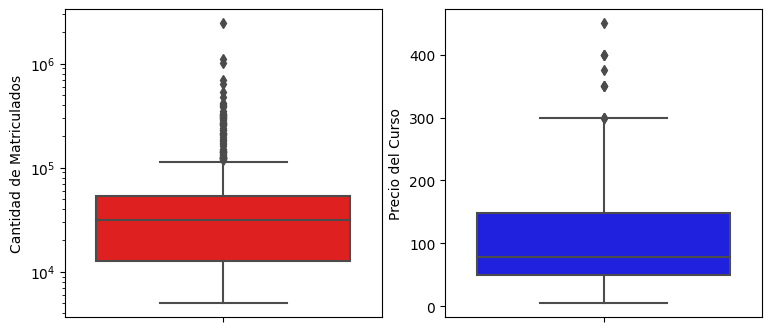

In [289]:
fig,ax=plt.subplots(1,2,figsize=(9,4))

sns.boxplot(y="n_enrolled",data=df_edx,ax=ax[0],color="red")
ax[0].set(yscale="log")
ax[0].set_ylabel("Cantidad de Matriculados")

sns.boxplot(y="price",data=df_edx,ax=ax[1],color="blue")
ax[1].set_ylabel("Precio del Curso");

CONCLUSIÓN: Ambas variables, ``n_enrolled`` y ``price``, presentan outliers superiores. Esto indica que hay pocos cursos con un gran número de alumnos matriculados (aproximadamente más de 100,000) y que existen pocos cursos con un precio alto (mayor a $300) para la certificación de los mismos.

* #### **Histogramas de las variables numéricas**

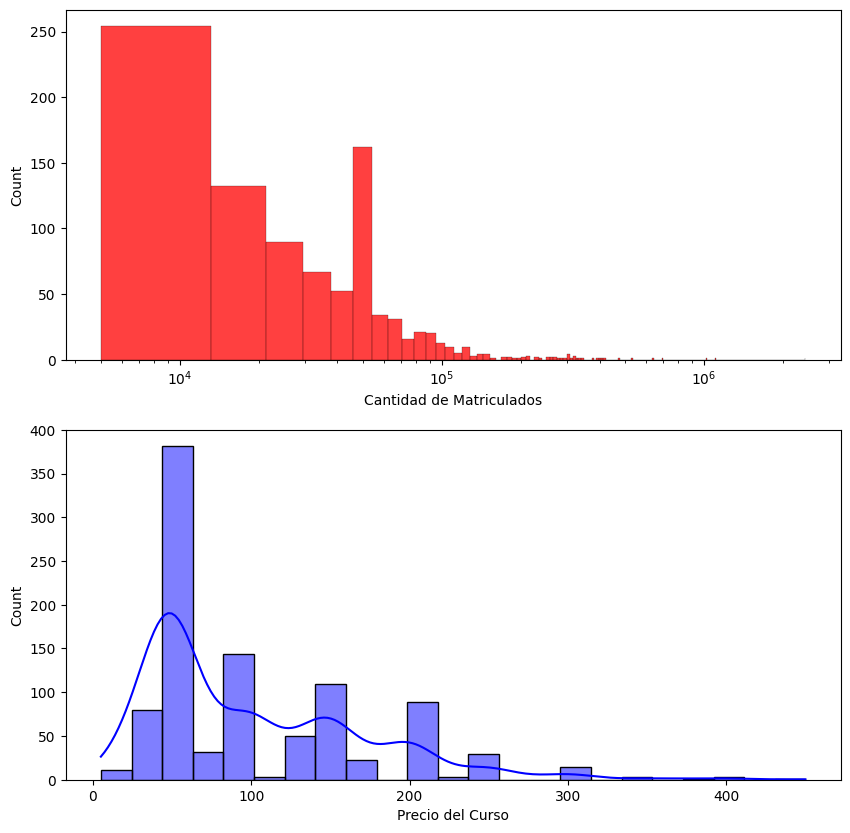

In [290]:
fig,ax=plt.subplots(2,1,figsize=(10,10))

sns.histplot(x="n_enrolled",data=df_edx,ax=ax[0],color="red")
ax[0].set(xscale="log")
ax[0].set_xlabel("Cantidad de Matriculados")

sns.histplot(x="price",data=df_edx,ax=ax[1],color="blue",kde=True)
ax[1].set_xlabel("Precio del Curso");

CONCLUSIÓN: La variable ``n_enrolled`` muestra una distribución multimodal sesgada hacia la derecha, con picos principales aproximadamente alrededor de 1000 y 70000 matriculados. Por otro lado, la variable ``price`` también presenta una distribución multimodal sesgada hacia la derecha, con picos principales alrededor de 50 y 90 dólares. Estas observaciones refuerzan las conclusiones obtenidas a partir de los boxplots analizados.

* #### **Barplots de las variables categóricas**

*Al visualizar los gráficos de barras se pueden extraer conclusiones visuales relevantes de manera rápida y efectiva, tales como las categorías predominantes de una variable.*

##### Variable ``course_type``

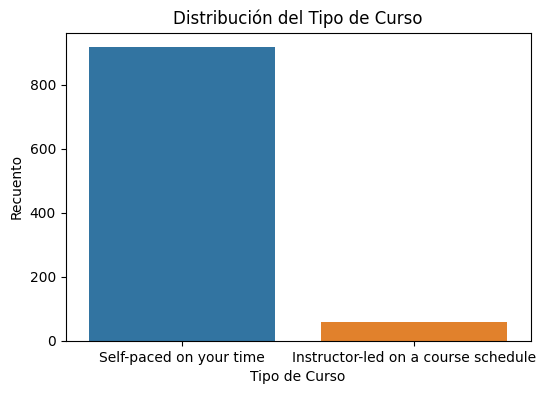

In [291]:
plt.figure(figsize=(6,4))
sns.countplot(x="course_type",data=df_edx)
plt.xlabel("Tipo de Curso")
plt.ylabel("Recuento")
plt.title("Distribución del Tipo de Curso");

##### Variable ``Level``

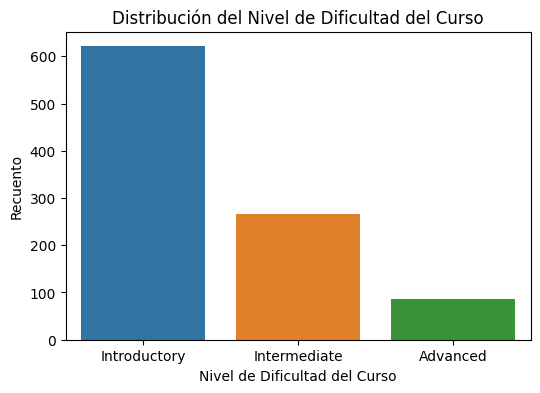

In [292]:
plt.figure(figsize=(6,4))
sns.countplot(x="Level",data=df_edx)
plt.xlabel("Nivel de Dificultad del Curso")
plt.ylabel("Recuento")
plt.title("Distribución del Nivel de Dificultad del Curso");

##### Variable ``language``

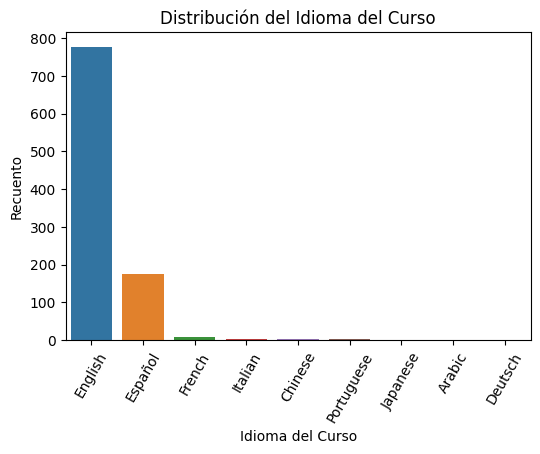

In [293]:
se=df_edx.language.value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=se.index.map(lambda x: Translator().translate(x,dest="en").text),y=se)
plt.xlabel("Idioma del Curso")
plt.ylabel("Recuento")
plt.title("Distribución del Idioma del Curso")
plt.xticks(rotation=60);

##### Variable ``institution``

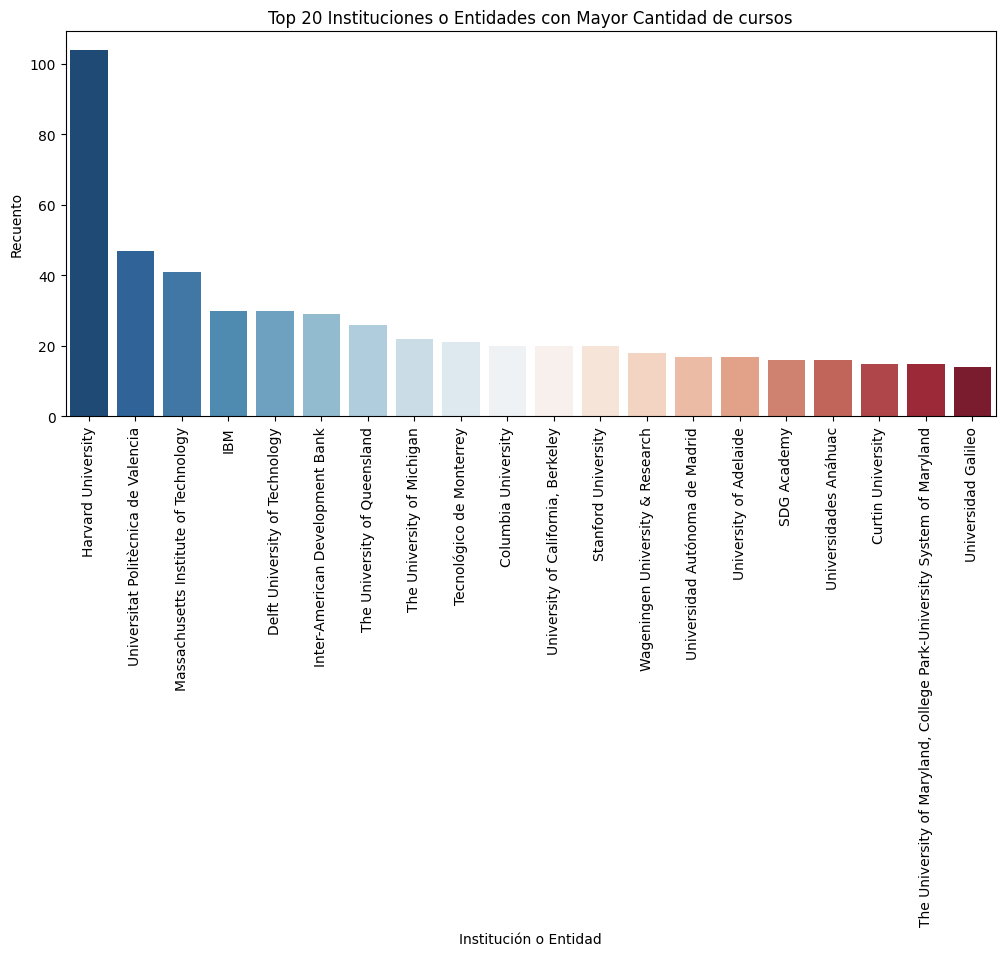

In [294]:
top_institution=df_edx.institution.value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=top_institution.index,y=top_institution,palette="RdBu_r")
plt.xlabel('Institución o Entidad')
plt.ylabel('Recuento')
plt.title('Top 20 Instituciones o Entidades con Mayor Cantidad de cursos')
plt.xticks(rotation=90);

##### Variable ``instructors``

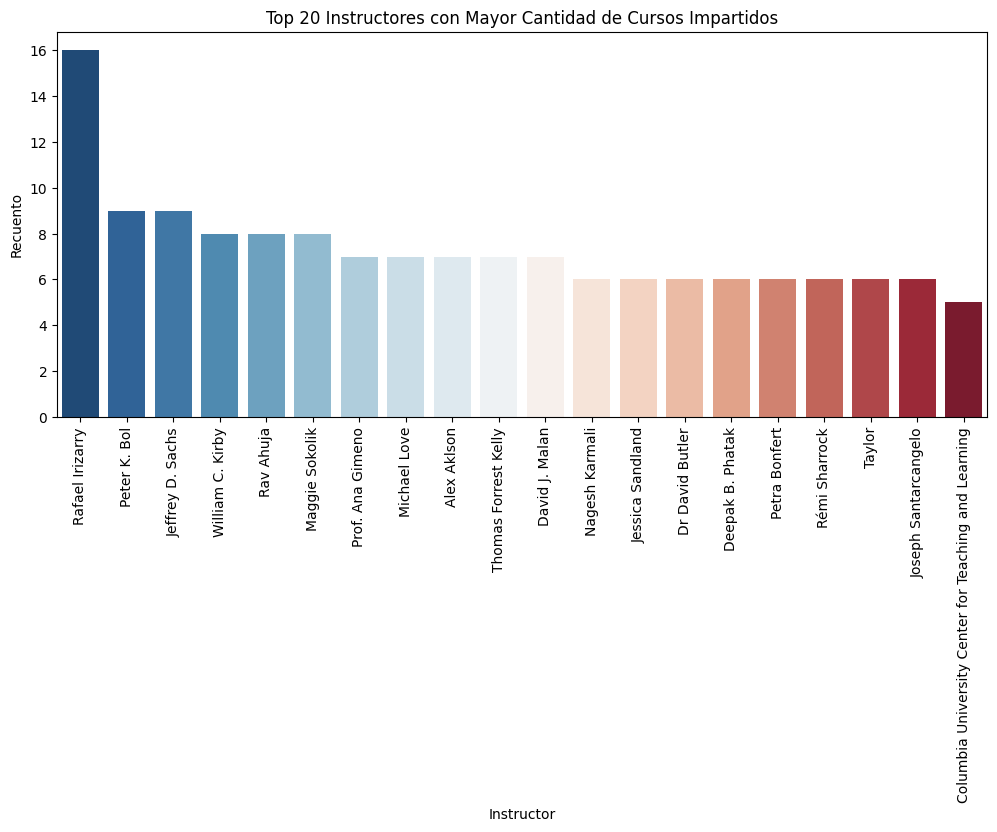

In [295]:
top_instructors=df_edx.instructors.explode().value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=top_instructors.index,y=top_instructors,palette="RdBu_r")
plt.xlabel('Instructor')
plt.ylabel('Recuento')
plt.title('Top 20 Instructores con Mayor Cantidad de Cursos Impartidos')
plt.xticks(rotation=90);

##### Variable ``subject``

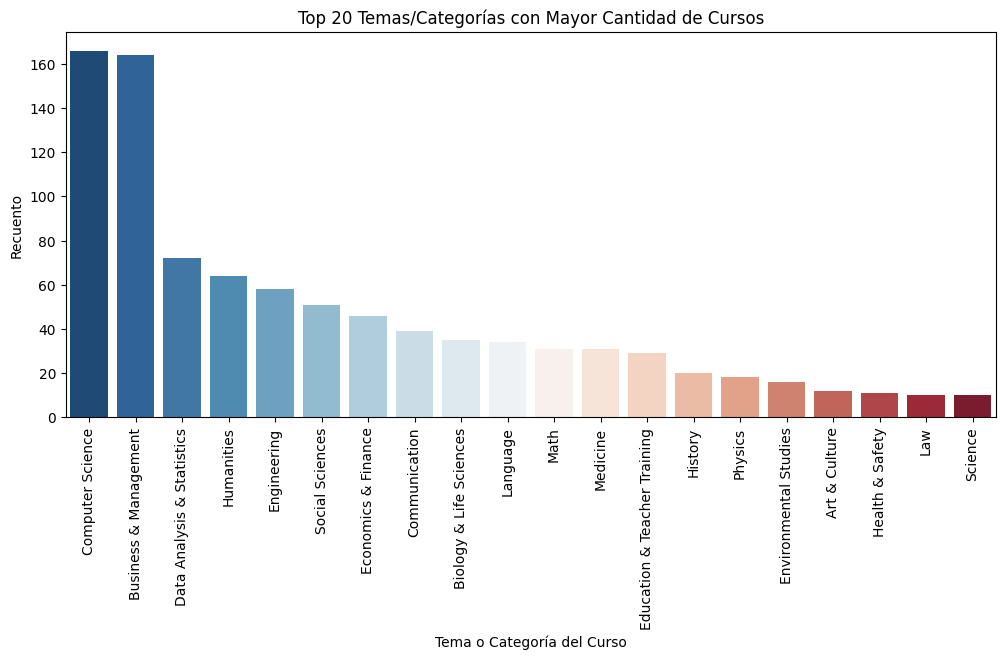

In [296]:
top_subject=df_edx.subject.value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=top_subject.index,y=top_subject,palette="RdBu_r")
plt.xlabel('Tema o Categoría del Curso')
plt.ylabel('Recuento')
plt.title('Top 20 Temas/Categorías con Mayor Cantidad de Cursos')
plt.xticks(rotation=90);

##### Variable ``subtitles``

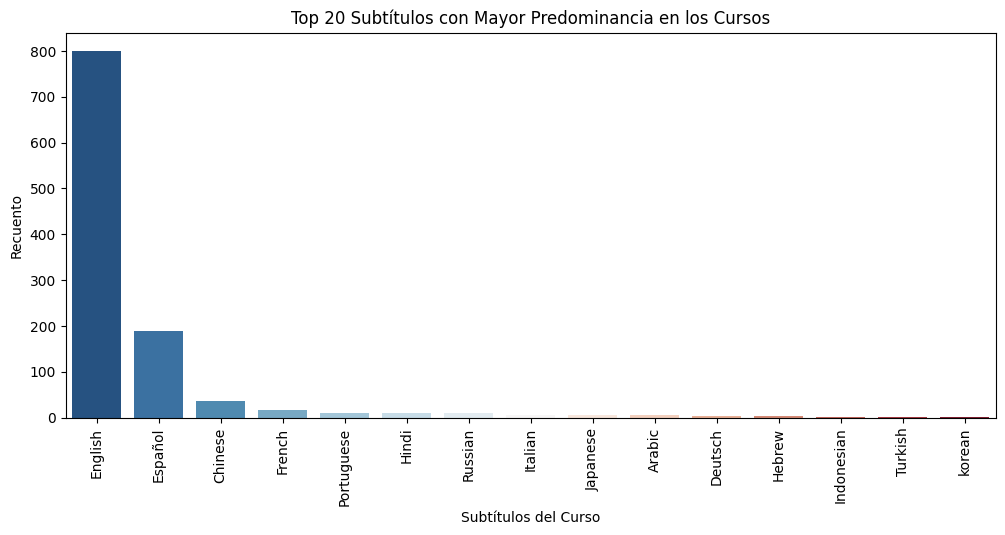

In [297]:
top_subtitles=df_edx.subtitles.explode().value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=top_subtitles.index.map(lambda x: Translator().translate(x,dest="en").text),y=top_subtitles,palette="RdBu_r")
plt.xlabel('Subtítulos del Curso')
plt.ylabel('Recuento')
plt.title('Top 20 Subtítulos con Mayor Predominancia en los Cursos')
plt.xticks(rotation=90);

##### Variable ``course_effort``

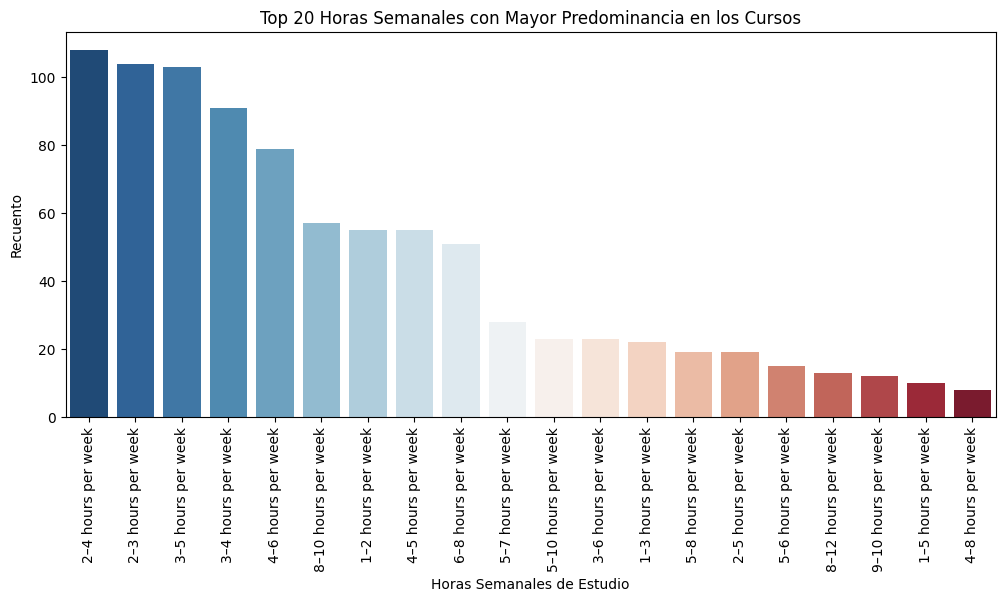

In [298]:
top_course=df_edx.course_effort.value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=top_course.index,y=top_course,palette="RdBu_r")
plt.xlabel('Horas Semanales de Estudio')
plt.ylabel('Recuento')
plt.title('Top 20 Horas Semanales con Mayor Predominancia en los Cursos')
plt.xticks(rotation=90);

##### Variable ``course_length``

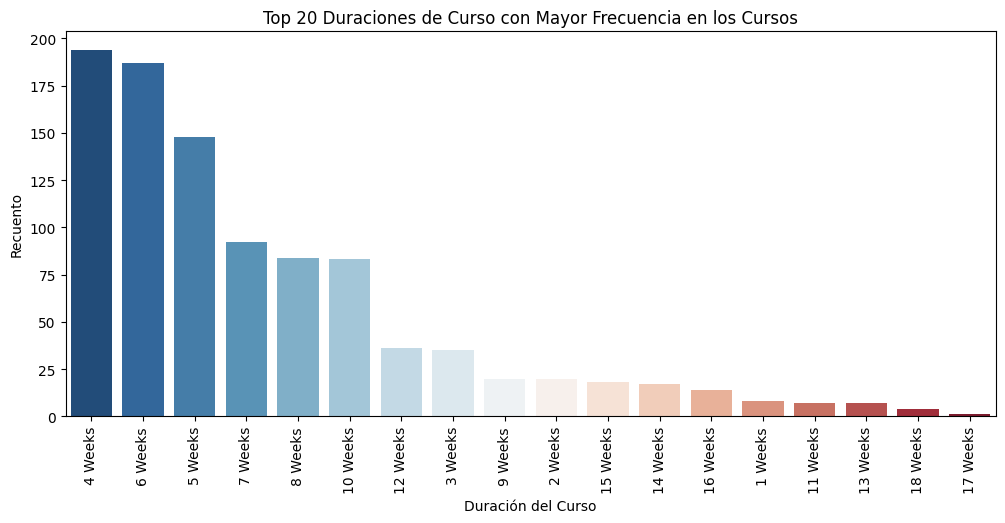

In [299]:
top_course=df_edx.course_length.value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=top_course.index,y=top_course,palette="RdBu_r")
plt.xlabel('Duración del Curso')
plt.ylabel('Recuento')
plt.title('Top 20 Duraciones de Curso con Mayor Frecuencia en los Cursos')
plt.xticks(rotation=90);

* #### **Word Cloud: variable `title_eda`**

In [300]:
# Creamos una variable donde estén unidas todas las palabras de todas las filas de la columna 'title_eda'
text=" ".join(df_edx.title_eda.str.join(" "))
# Generamos una imagen que contenga las palabras que más se repiten en la columna 'title_eda'
stylecloud.gen_stylecloud(text=text,
                          icon_name="fas fa-cloud",
                          background_color="black",
                          output_name="title_edx_wordcloud.png")

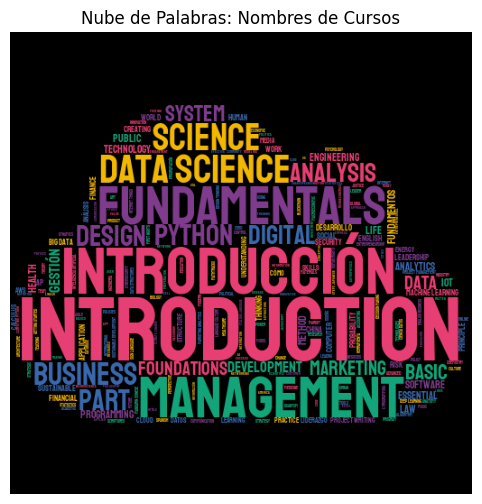

In [301]:
# Visualizamos la imagen del Word Cloud generado
image=plt.imread("Datasets/title_edx_wordcloud.png")
plt.figure(figsize=(8,6))
plt.title("Nube de Palabras: Nombres de Cursos")
plt.imshow(image)
plt.axis("off");

* #### **Word Cloud: variable `summary`**

In [302]:
# Creamos una variable donde estén unidas todas las palabras de todas las filas de la columna 'summary'
text=" ".join(df_edx.summary.str.join(" "))
# Generamos una imagen que contenga las palabras que más se repiten en la columna 'summary'
stylecloud.gen_stylecloud(text=text,
                          icon_name="fas fa-cloud",
                          background_color="black",
                          output_name="summary_edx_wordcloud.png")

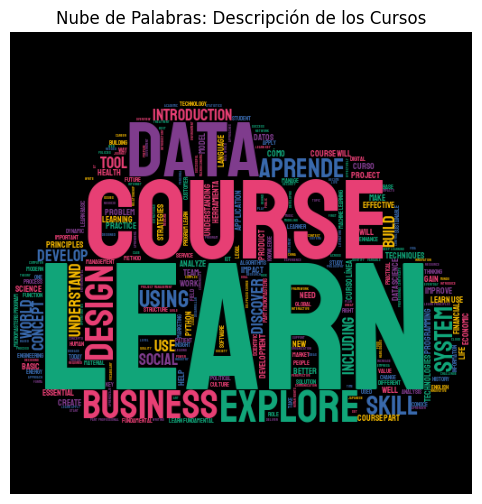

In [303]:
# Visualizamos la imagen del Word Cloud generado
image=plt.imread("Datasets/summary_edx_wordcloud.png")
plt.figure(figsize=(8,6))
plt.title("Nube de Palabras: Descripción de los Cursos")
plt.imshow(image)
plt.axis("off");

#### **``Análisis Bivariado``**

* #### **Heatmap de las variables numéricas**

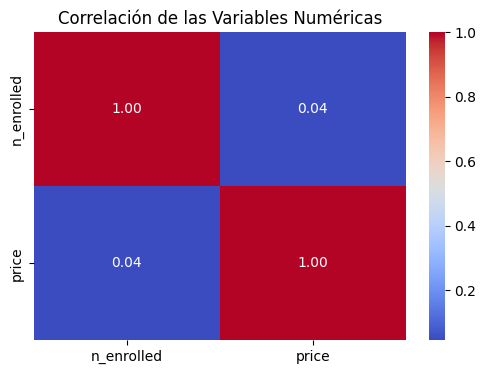

In [304]:
plt.figure(figsize=(6,4))
sns.heatmap(df_edx.corr(numeric_only=True),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlación de las Variables Numéricas");

CONCLUSIÓN: Podemos observar que las variables ``price`` y ``n_enrolled`` presentan una correlación positiva muy baja (0.04). Esto implica que un aumento en el número de estudiantes matriculados no está necesariamente asociado con un incremento en el precio de la certificación del curso. Por otro lado, tampoco existe una correlación negativa entre estas variables, lo cual significa que un precio más bajo no se traduce necesariamente en una mayor cantidad de estudiantes matriculados.

* #### **Barplot: Total de Matriculados por Categoría de Curso**

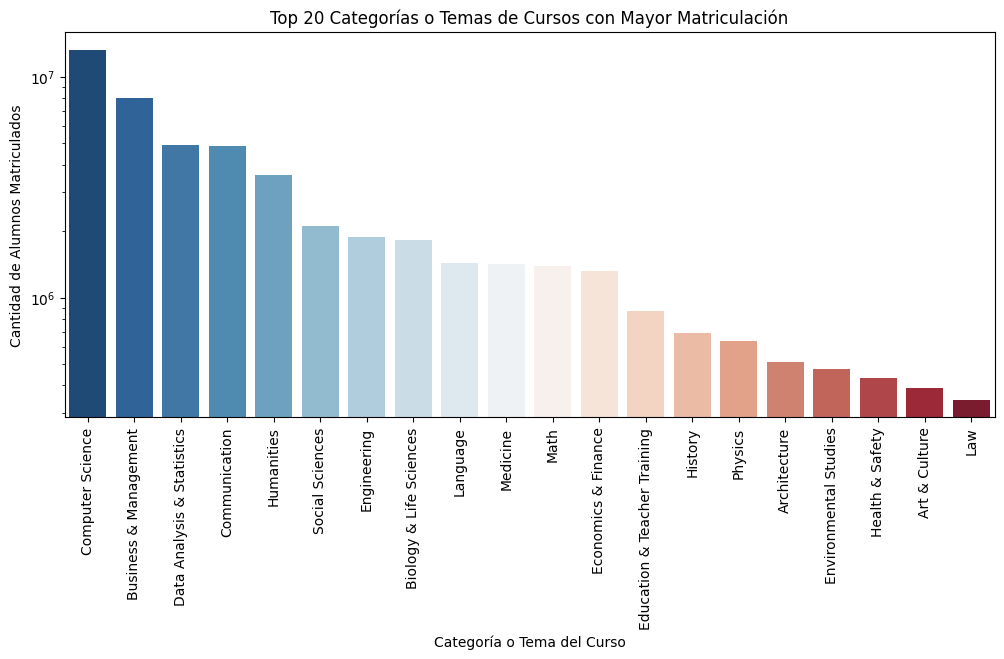

In [310]:
df_b1=df_edx.groupby("subject")["n_enrolled"].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,5))
ax=sns.barplot(x=df_b1.index,y=df_b1, palette="RdBu_r")
plt.xlabel("Categoría o Tema del Curso")
plt.ylabel("Cantidad de Alumnos Matriculados")
plt.yscale("log")
plt.title("Top 20 Categorías o Temas de Cursos con Mayor Matriculación")
plt.xticks(rotation=90);

CONCLUSIÓN:  Las áreas de Computer Science y Business & Management destacan como las más populares, con alrededor de 10 millones de matriculados, seguidas de cerca por Data Analysis & Statistics, Communication y Humanities, con más de 5 millones de matriculados. Estos resultados revelan un claro interés en disciplinas relacionadas con la tecnología y los negocios entre la mayoría de los estudiantes inscritos en los cursos

* #### **Barplot: Promedio del Precio de Certificación por Institución o Entidad**

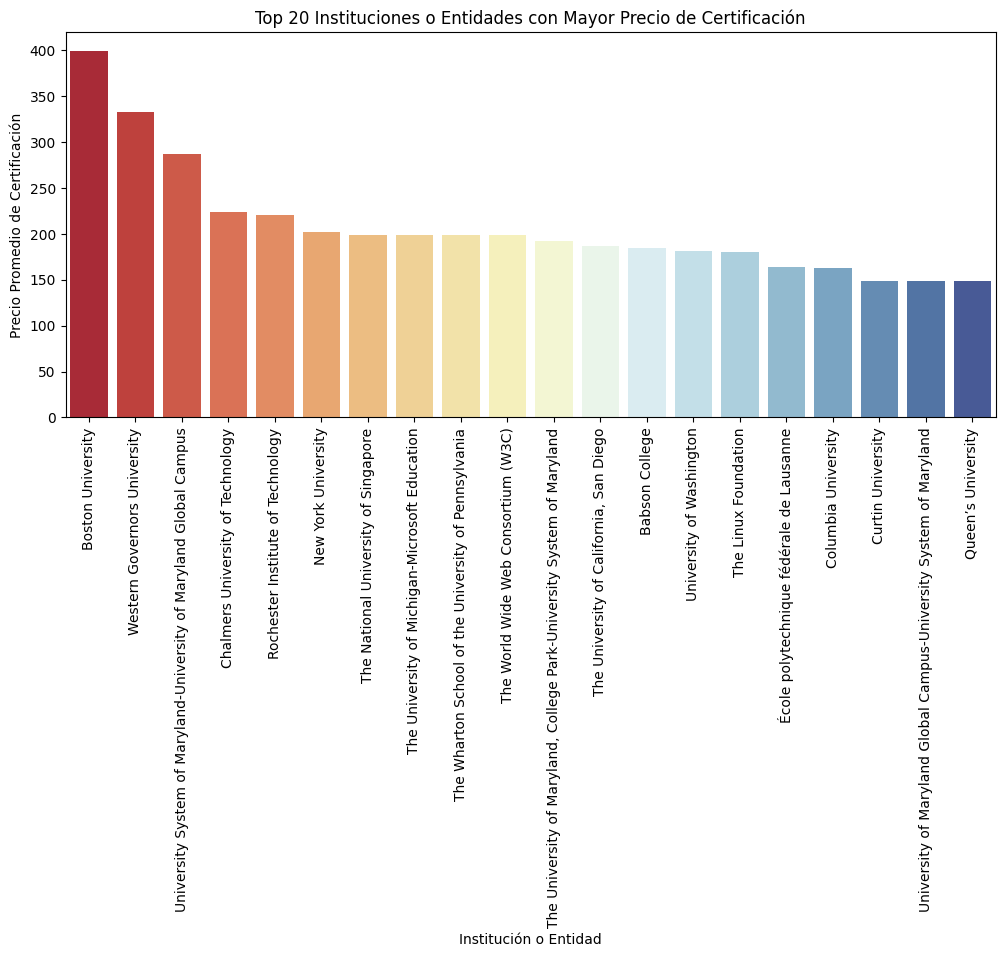

In [315]:
df_b2=df_edx.groupby("institution")["price"].mean().round(2).sort_values(ascending=False).head(20)
plt.figure(figsize=(12,5))
ax=sns.barplot(x=df_b2.index,y=df_b2, palette="RdYlBu")
plt.xlabel("Institución o Entidad")
plt.ylabel("Precio Promedio de Certificación")
plt.title("Top 20 Instituciones o Entidades con Mayor Precio de Certificación")
plt.xticks(rotation=90);

CONCLUSIÓN: El análisis de las instituciones o entidades con mayor precio de certificación revela que la mayoría de ellas son reconocidas universidades. Esto demuestra que estas instituciones académicas valoran y cobran más por sus certificados, posiblemente debido a su prestigio y calidad educativa

***Exportación del data frame resultante para la realización de los Dashboards***

In [324]:
df_edx.drop(columns=["summary","title_eda"]).to_csv("edx_transformation.csv",index=False)

---

## **Dataset: `Plataforma Udemy`**

### **ETL**

* #### **Carga de Datos**

In [87]:
df_udemy=pd.read_csv("Datasets/udemy_courses.csv")
df_udemy

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [88]:
# Información del dataframe
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


* #### **Eliminación de columnas innecesarias**
* `course_id`: puede ser eliminada, puesto que al ser un identificador único y al no ser utilizado para ninguna transformación no aporta ningún valor al EDA o a la realización de los dashboards.
* ``url``: se elimina debido a la imposibilidad de obtener información adicional a través del web scraping.

In [89]:
df_udemy.drop(columns=["course_id","url"],inplace=True)

* #### **Conversión de la variable `published_timestamp` a tipo date**

In [90]:
df_udemy["published_timestamp"]=pd.to_datetime(df_udemy.published_timestamp).dt.date

* #### **Preprocesamiento de texto de la variable `course_title` (solo para el EDA)**

In [91]:
# Aplicando la función de preprocesamiento de texto
df_udemy["title"]=df_udemy.course_title.apply(preprocess_text)

* #### **Visualización del resultado del ETL**

In [92]:
df_udemy.head(3)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,title
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18,Business Finance,"[ultimate, investment, banking, course]"
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09,Business Finance,"[complete, gst, course, certification, grow, c..."
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19,Business Finance,"[financial, modeling, business, analysts, cons..."


In [93]:
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_title         3678 non-null   object 
 1   is_paid              3678 non-null   bool   
 2   price                3678 non-null   int64  
 3   num_subscribers      3678 non-null   int64  
 4   num_reviews          3678 non-null   int64  
 5   num_lectures         3678 non-null   int64  
 6   level                3678 non-null   object 
 7   content_duration     3678 non-null   float64
 8   published_timestamp  3678 non-null   object 
 9   subject              3678 non-null   object 
 10  title                3678 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 291.1+ KB


### **Análisis Exploratorio de Datos (EDA)**

#### **``Análisis Univariado``**

* #### **Estadísticas descriptivas de las variables numéricas**

In [327]:
df_udemy.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,156.259108,40.108755,4.094517
std,61.005755,9504.117010,935.452044,50.383346,6.053840
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.000000,4.000000,15.000000,1.000000
50%,45.000000,911.500000,18.000000,25.000000,2.000000
75%,95.000000,2546.000000,67.000000,45.750000,4.500000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000


* #### **Diagrama de Cajas de las variables numéricas**

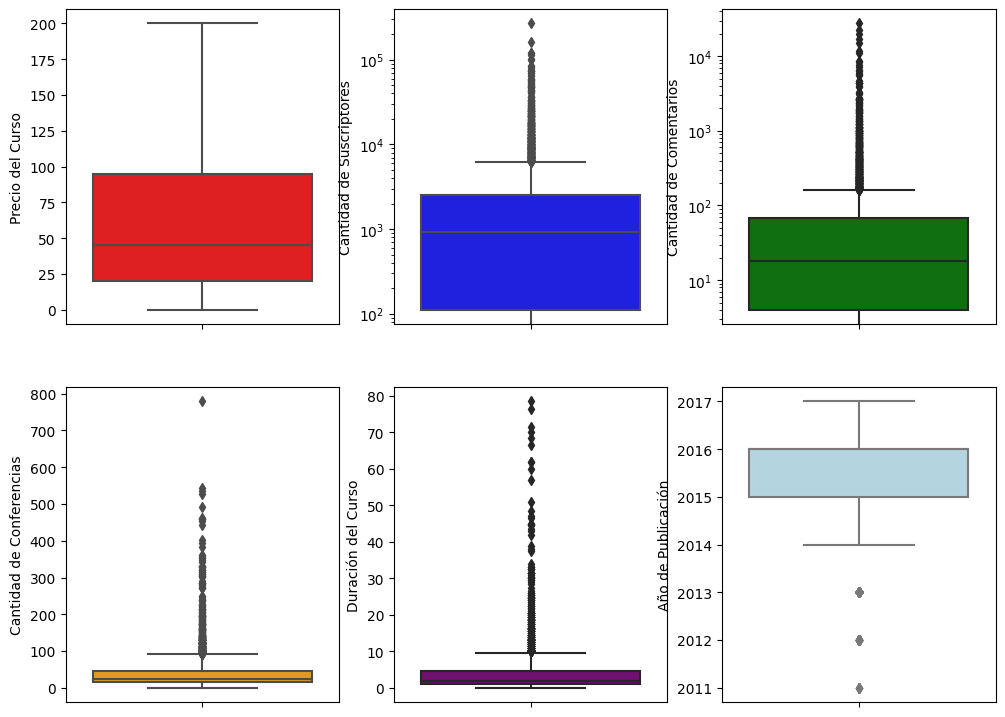

In [344]:
fig,ax=plt.subplots(2,3,figsize=(12,9))

sns.boxplot(y="price",data=df_udemy,ax=ax[0,0],color="red")
ax[0,0].set_ylabel("Precio del Curso")

sns.boxplot(y="num_subscribers",data=df_udemy,ax=ax[0,1],color="blue")
ax[0,1].set_ylabel("Cantidad de Suscriptores")
ax[0,1].set_yscale("log")

sns.boxplot(y="num_reviews",data=df_udemy,ax=ax[0,2],color="green")
ax[0,2].set_ylabel("Cantidad de Comentarios")
ax[0,2].set_yscale("log")

sns.boxplot(y="num_lectures",data=df_udemy,ax=ax[1,0],color="#FFA500")
ax[1,0].set_ylabel("Cantidad de Conferencias")

sns.boxplot(y="content_duration",data=df_udemy,ax=ax[1,1],color="#800080")
ax[1,1].set_ylabel("Duración del Curso")

sns.boxplot(y=pd.to_datetime(df_udemy.published_timestamp).dt.year,data=df_udemy,ax=ax[1,2],color="#ADD8E6")
ax[1,2].set_ylabel("Año de Publicación");

CONCLUSIÓN: La variable ``price`` no presenta valores atípicos, lo que indica que los precios de los cursos se encuentran dentro de un rango considerado normal, alrededor de su media. En cuanto a los años de la variable ``published_timestamp``, solo se observan tres valores atípicos inferiores correspondientes a los años 2011, 2012 y 2013. Esto sugiere que prácticamente todos los cursos fueron estrenados a partir del año 2014. En cuanto a las variables ``num_subscribers``, ``num_reviews``, ``num_lectures`` y ``content_duration``, se encuentran numerosos valores atípicos superiores, lo cual indica que hay pocos cursos con un gran número de suscriptores, comentarios, conferencias o con una gran duración del curso.

* #### **Histogramas de las variables numéricas**

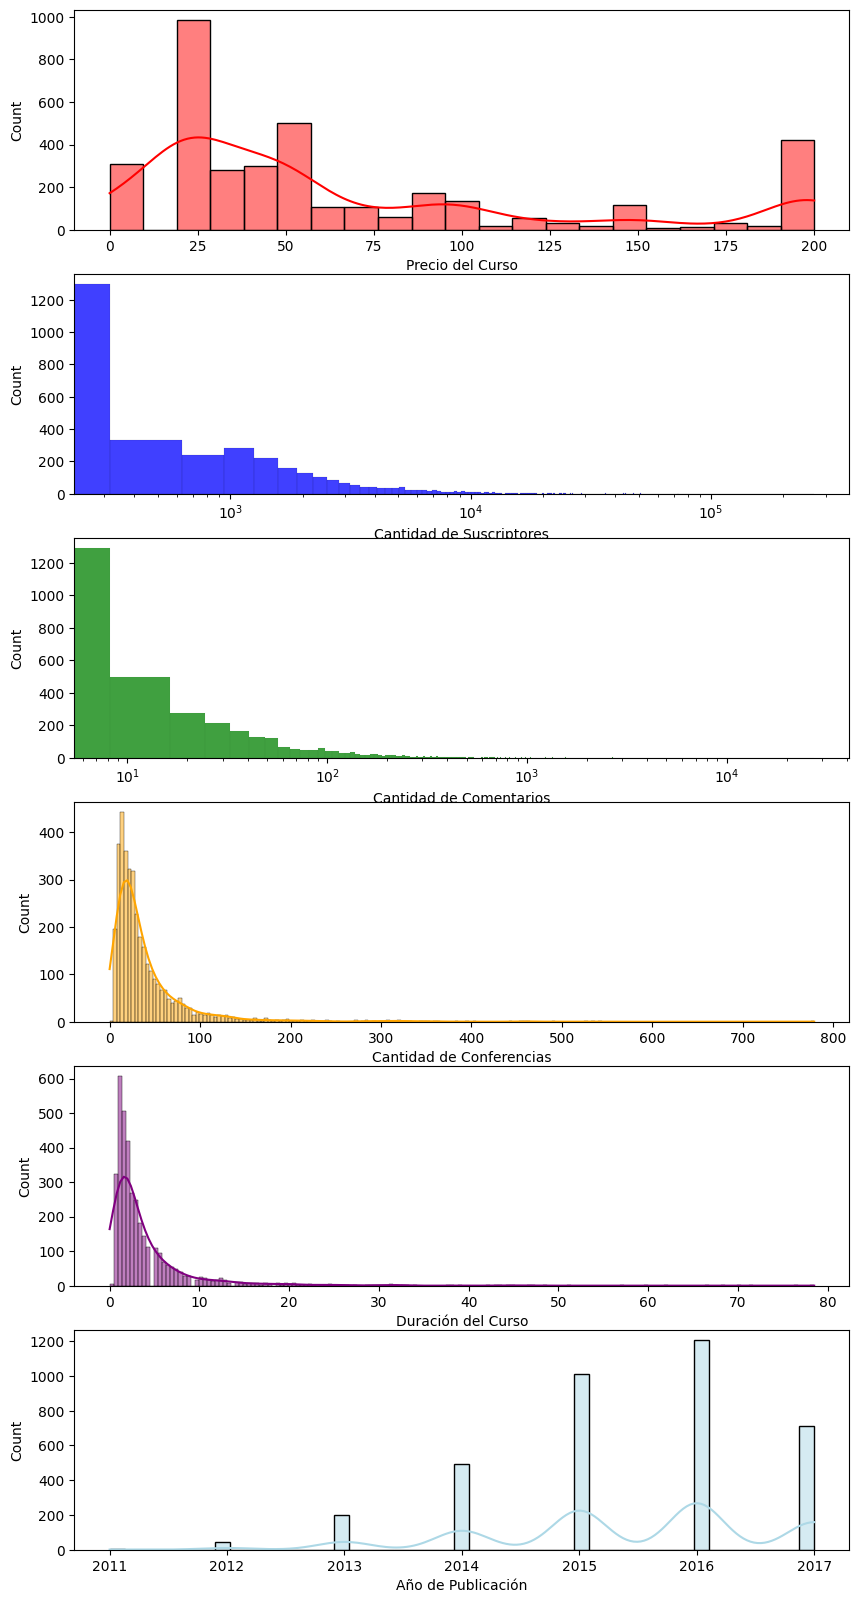

In [348]:
fig,ax=plt.subplots(6,1,figsize=(10,20))

sns.histplot(x="price",data=df_udemy,ax=ax[0],color="red",kde=True)
ax[0].set_xlabel("Precio del Curso")

sns.histplot(x="num_subscribers",data=df_udemy,ax=ax[1],color="blue")
ax[1].set_xlabel("Cantidad de Suscriptores")
ax[1].set_xscale("log")

sns.histplot(x="num_reviews",data=df_udemy,ax=ax[2],color="green")
ax[2].set_xlabel("Cantidad de Comentarios")
ax[2].set_xscale("log")

sns.histplot(x="num_lectures",data=df_udemy,ax=ax[3],color="#FFA500",kde=True)
ax[3].set_xlabel("Cantidad de Conferencias")

sns.histplot(x="content_duration",data=df_udemy,ax=ax[4],color="#800080",kde=True)
ax[4].set_xlabel("Duración del Curso")

sns.histplot(x=pd.to_datetime(df_udemy.published_timestamp).dt.year,data=df_udemy,ax=ax[5],color="#ADD8E6",kde=True)
ax[5].set_xlabel("Año de Publicación");

CONCLUSIÓN: La variable ``price`` muestra una distribución multimodal sin ningún sesgo evidente, lo cual se debe a la ausencia de valores atípicos. El pico principal se encuentra alrededor de 25, indicando que la mayoría de los cursos tienen ese precio. En cuanto a los años de la variable ``published_timestamp``, se observa una ligera inclinación hacia la izquierda debido a la presencia de solo tres valores atípicos inferiores. Además, se puede apreciar que la mayor cantidad de cursos se estrenaron en el año 2016, como lo indica el pico principal. 
Por otro lado, las variables ``num_subscribers``, ``num_reviews``, ``num_lectures`` y ``content_duration`` presentan una distribución sesgada hacia la derecha debido a la presencia de valores atípicos superiores. Estos hallazgos refuerzan el análisis anterior basado en los gráficos de cajas.

* #### **Barplots (Gráficos de Barras)  de las variables categóricas**

##### Variable ``level``

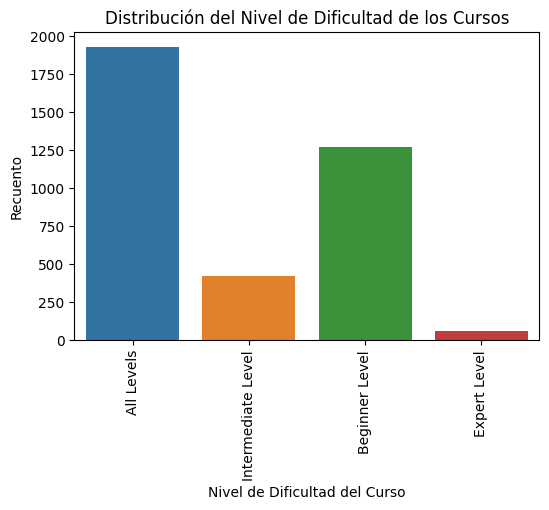

In [355]:
plt.figure(figsize=(6,4))
sns.countplot(x="level",data=df_udemy)
plt.xlabel("Nivel de Dificultad del Curso")
plt.ylabel("Recuento")
plt.title("Distribución del Nivel de Dificultad de los Cursos")
plt.xticks(rotation=90);

##### Variable ``subject``

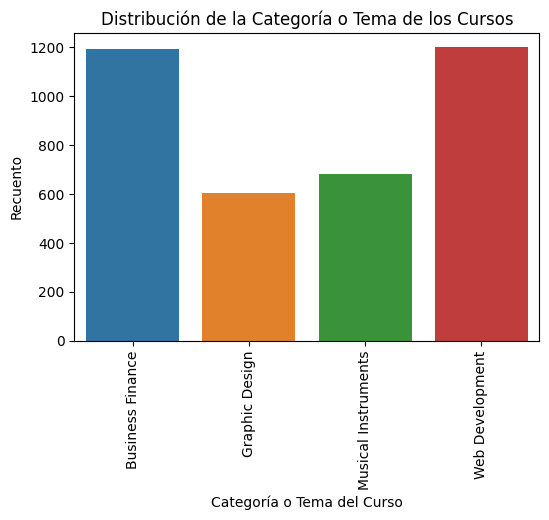

In [357]:
plt.figure(figsize=(6,4))
sns.countplot(x="subject",data=df_udemy)
plt.xlabel("Categoría o Tema del Curso")
plt.ylabel("Recuento")
plt.title("Distribución de la Categoría o Tema de los Cursos")
plt.xticks(rotation=90);

##### Variable ``is_paid``

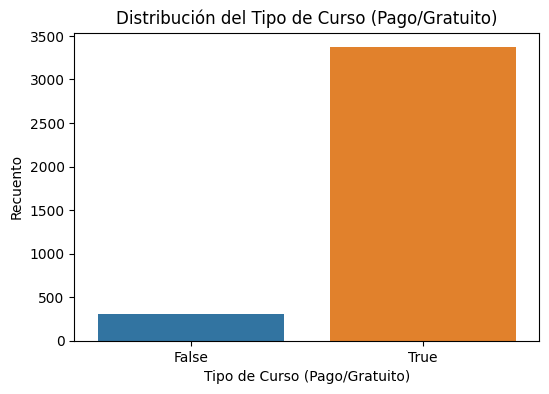

In [359]:
plt.figure(figsize=(6,4))
sns.countplot(x="is_paid",data=df_udemy)
plt.xlabel("Tipo de Curso (Pago/Gratuito)")
plt.ylabel("Recuento")
plt.title("Distribución del Tipo de Curso (Pago/Gratuito)");
# Se puede observar que casi todos los cursos son de pago

* #### **Word Cloud: variable `title`**

In [360]:
# Creamos una variable donde estén unidas todas las palabras de todas las filas de la columna 'title'
text=" ".join(df_udemy.title.str.join(" "))
# Generamos una imagen que contenga las palabras que más se repiten en la columna 'title'
stylecloud.gen_stylecloud(text=text,
                          icon_name="fas fa-cloud",
                          background_color="black",
                          output_name="title_udemy_wordcloud.png")

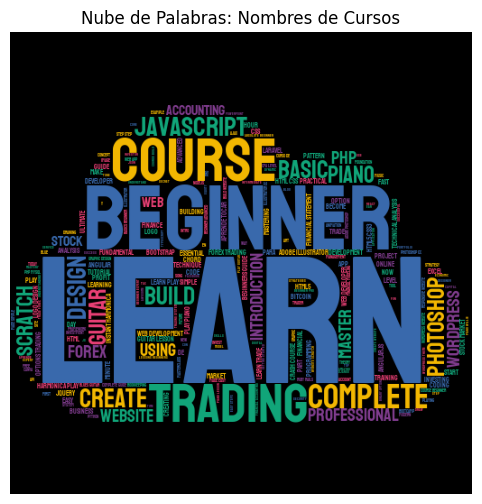

In [361]:
# Visualizamos la imagen del Word Cloud generado
image=plt.imread("Datasets/title_udemy_wordcloud.png")
plt.figure(figsize=(8,6))
plt.title("Nube de Palabras: Nombres de Cursos")
plt.imshow(image)
plt.axis("off");

#### **``Análisis Bivariado``**

* #### **Heatmap de las variables numéricas**

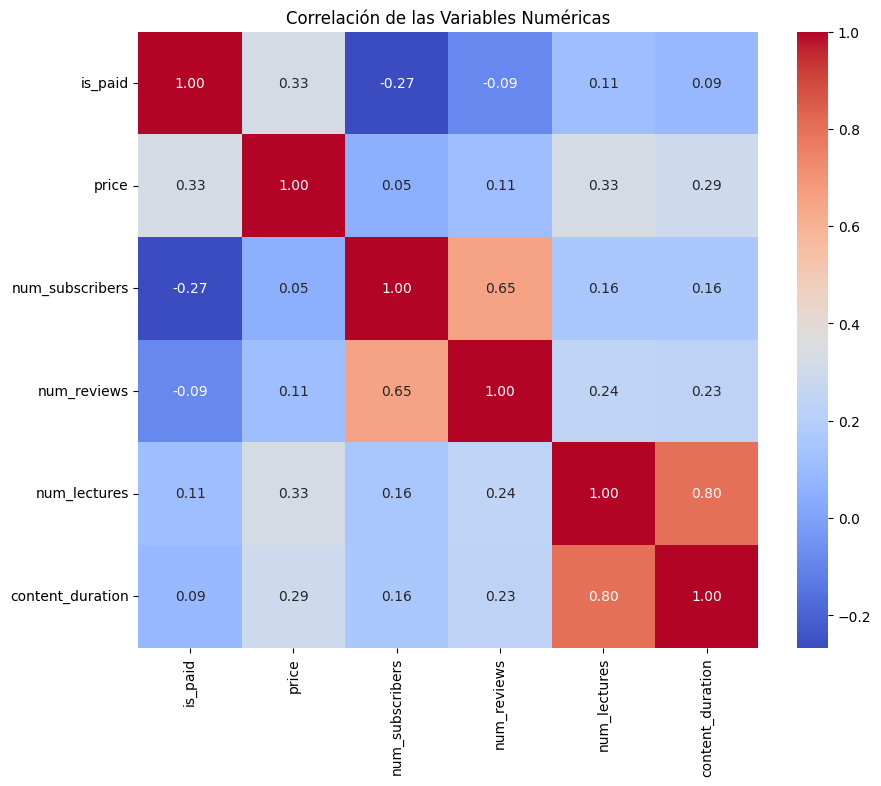

In [362]:
plt.figure(figsize=(10,8))
sns.heatmap(df_udemy.corr(numeric_only=True),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlación de las Variables Numéricas");

CONCLUSIÓN: Se observan correlaciones significativas entre varias variables. En particular, destaca una correlación positiva fuerte (0.8) entre las variables ``num_lectures`` y ``content_duration``, lo que indica que a medida que aumenta el número de conferencias o lecciones en un curso, también aumenta la duración del mismo. Además, se encuentra una correlación positiva fuerte (0.65) entre las variables ``num_subscribers`` y ``num_reviews``, lo que sugiere que a medida que aumenta el número de suscriptores de un curso, también se incrementa la cantidad de comentarios o reseñas.
Por otro lado, se observa una correlación negativa leve (-0.27) entre las variables ``num_subscribers`` e ``is_paid``, lo que implica que a medida que aumenta el número de suscriptores, disminuye la proporción de cursos de pago.

* #### **Barplot: Cantidad de Suscriptores por Nivel de Dificultad**

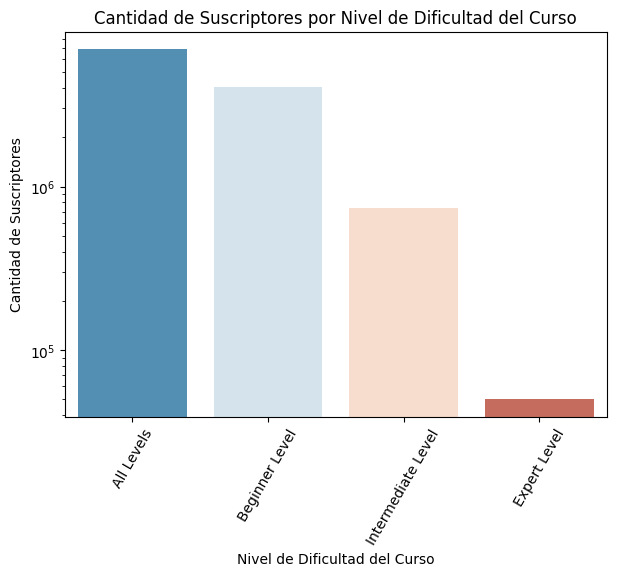

In [382]:
df_b1=df_udemy.groupby("level")["num_subscribers"].sum().sort_values(ascending=False)
plt.figure(figsize=(7,5))
ax=sns.barplot(x=df_b1.index,y=df_b1, palette="RdBu_r")
plt.xlabel("Nivel de Dificultad del Curso")
plt.ylabel("Cantidad de Suscriptores")
plt.yscale("log")
plt.title("Cantidad de Suscriptores por Nivel de Dificultad del Curso")
plt.xticks(rotation=60);

CONCLUSIÓN: La observación del gráfico revela que los cursos que abarcan todos los niveles de dificultad tienden a tener la mayor cantidad de suscriptores. Por otro lado, la categoría de nivel experto muestra la menor cantidad de suscriptores en comparación con otros niveles de dificultad. Esta tendencia puede explicarse por el hecho de que los cursos que abarcan múltiples niveles de dificultad atraen a una audiencia más amplia, ya que pueden satisfacer las necesidades de estudiantes principiantes, intermedios y avanzados. Por otro lado, los cursos de nivel experto pueden ser más especializados y atraer a una audiencia más limitada que posee un nivel de conocimiento y experiencia más avanzado en el tema.

* #### **Barplot: Precio Promedio del Curso por Categoría o Tema**

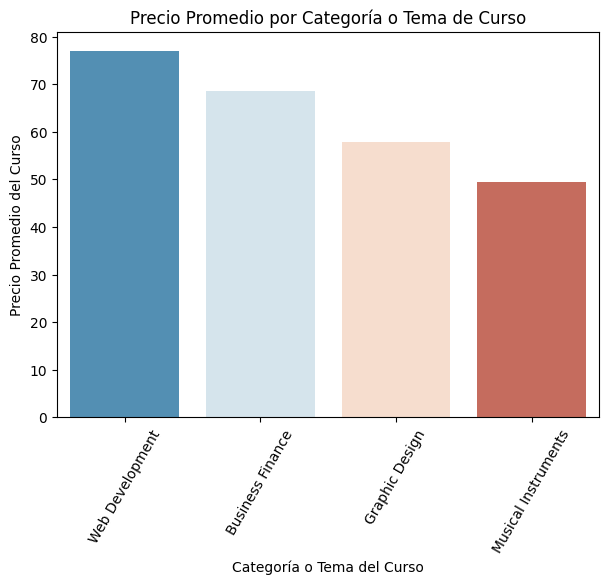

In [383]:
df_b2=df_udemy.groupby("subject")["price"].mean().round(2).sort_values(ascending=False)
plt.figure(figsize=(7,5))
ax=sns.barplot(x=df_b2.index,y=df_b2,palette="RdBu_r")
plt.xlabel("Categoría o Tema del Curso")
plt.ylabel("Precio Promedio del Curso")
plt.title("Precio Promedio por Categoría o Tema de Curso")
plt.xticks(rotation=60);

CONCLUSIÓN: Las categorías de cursos presentan precios promedio similares en general, aproximadamente alrededor de 65.

***Exportación del data frame resultante para la realización de los Dashboards***

In [386]:
df_udemy.drop(columns=["title"]).to_csv("udemy_transformation.csv",index=False)

---